In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# meta_log, hyper_log = load_result_logs(f"../experiments/ant/grid_noise")
meta_log, hyper_log = load_result_logs(f"../experiments/ant/grid_noise_2")
hyper_log

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


   env_name  popsize strategy_name  task_config/noise_level  task_config/num_evals_per_member  time_elapsed       run_id  test_eval_perf                                          log_paths                            experiment_dir                                       config_fname                     seeds model_type                                          log_fname
0       ant       16        OpenES                     0.00                                 1  20090.091384   b_1_eval_0     1696.752075  [experiments/ant/grid_noise_2/b_1_eval_0/logs/...   experiments/ant/grid_noise_2/b_1_eval_0  experiments/ant/grid_noise_2/b_1_eval_0/b_1_ev...  [381632, 562958, 924197]        jax  experiments/ant/grid_noise_2/b_1_eval_0/logs/b...
1       ant       16        OpenES                     0.00                                 2  20090.091384   b_1_eval_1     2218.765706  [experiments/ant/grid_noise_2/b_1_eval_1/logs/...   experiments/ant/grid_noise_2/b_1_eval_1  experiments/ant/grid_noise_2/b_

# Noise & Resource Allocation

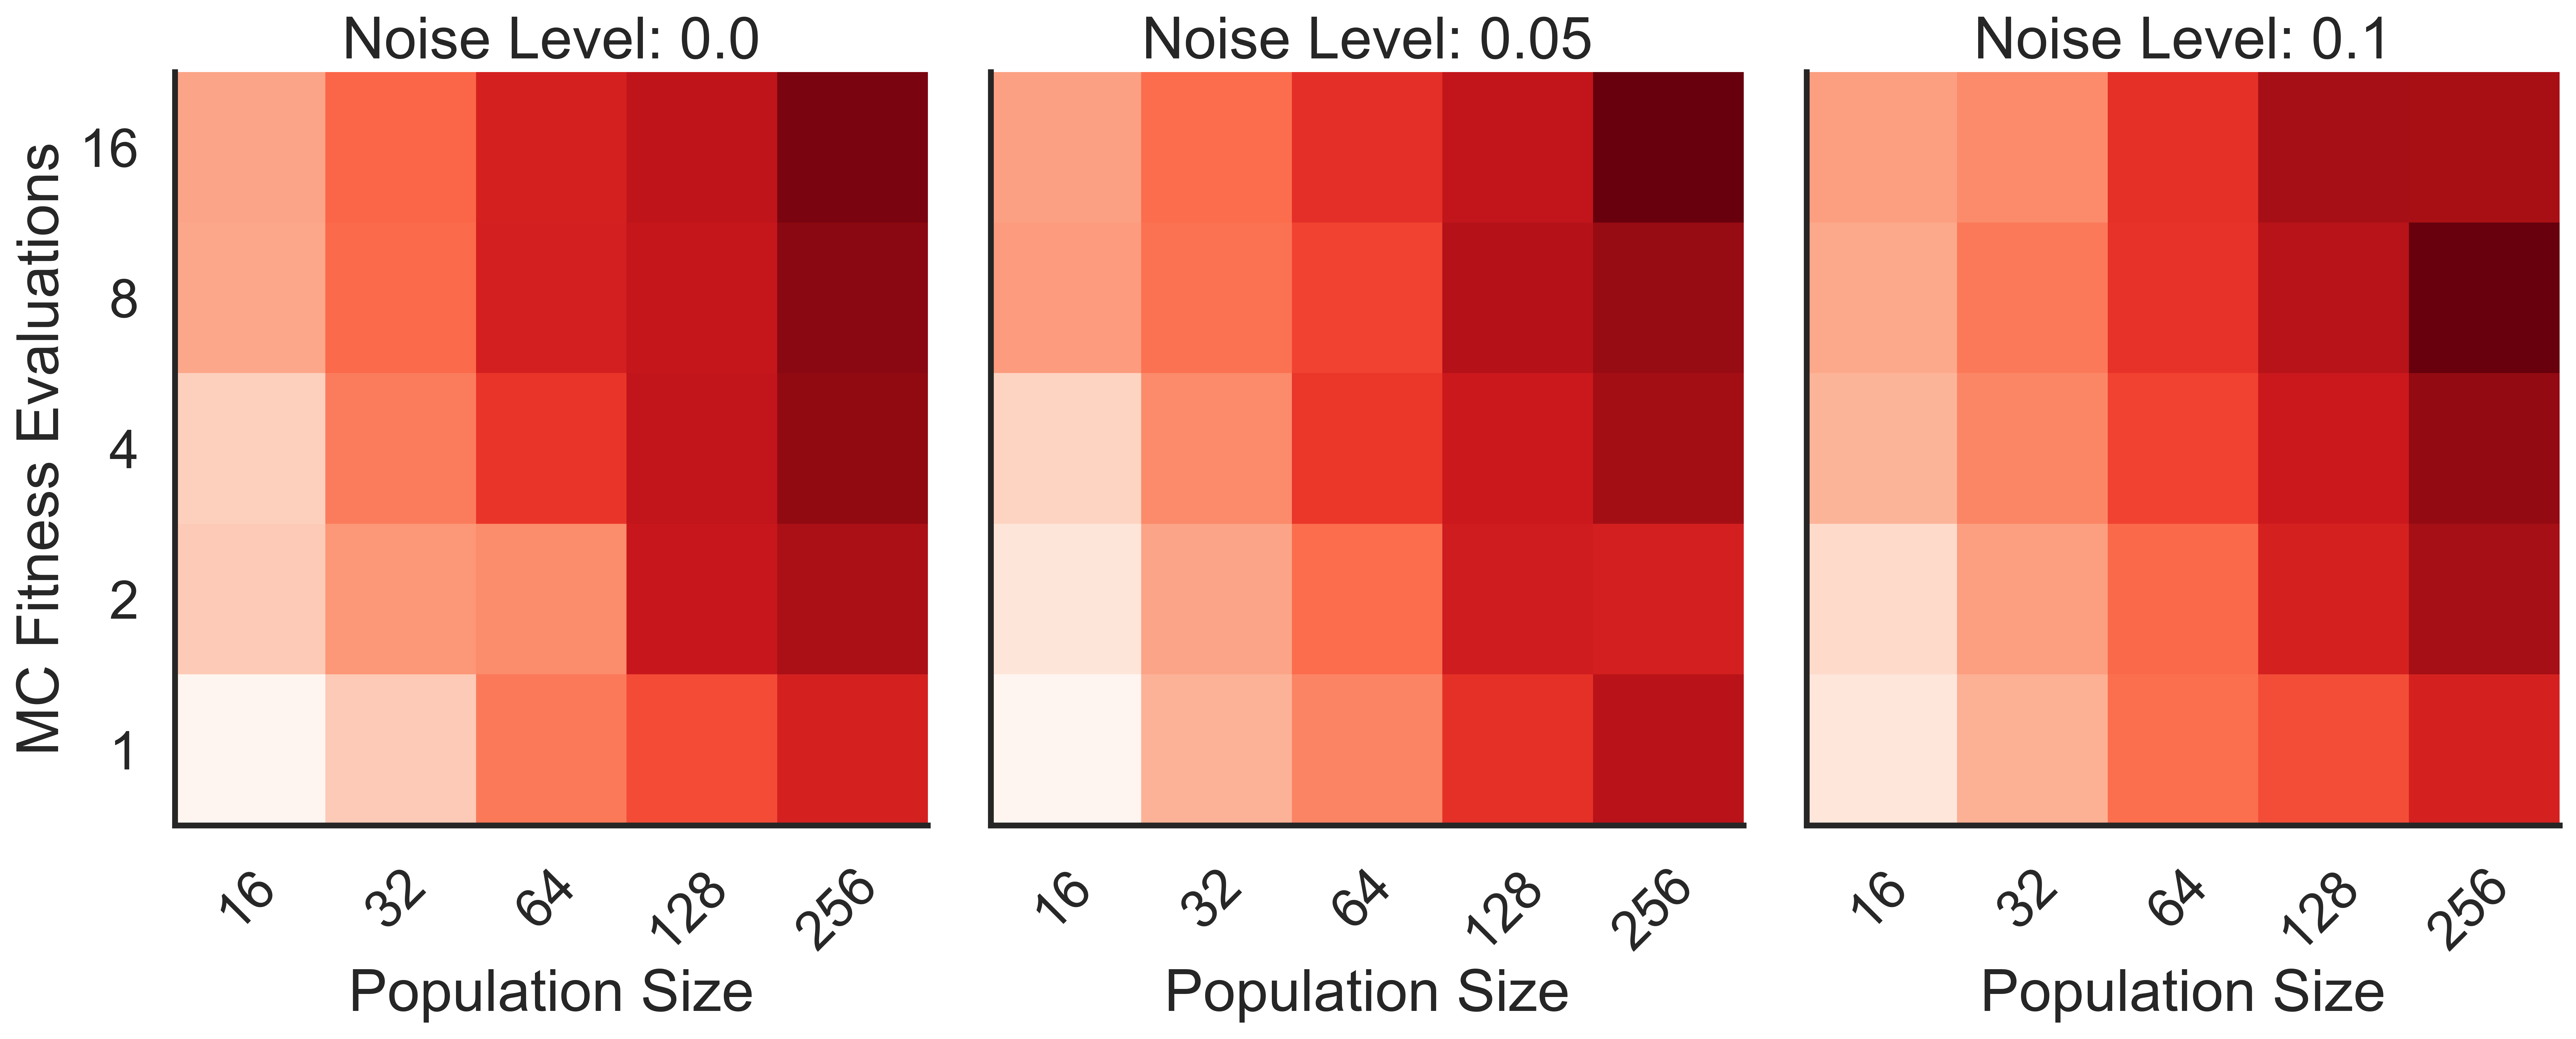

In [3]:
params_to_plot = ["popsize", "task_config/num_evals_per_member"]
target_to_plot = "test_eval_perf"
min_heat = 1800
max_heat = 3915
xylabels = ['Population Size', 'MC Fitness Evaluations']

fig, axs = plt.subplots(1, 3, figsize=(16, 10))
fixed_params = {"task_config/noise_level": 0.0}
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Noise Level: 0.0',
                  xy_labels=xylabels,
                  variable_name='Performance',
                  every_nth_tick=1, round_ticks=0,
                  text_in_cell=False, min_heat=min_heat, max_heat=max_heat,
                  cmap="Reds", fig=fig, ax=axs.flatten()[0],
                  plot_xlabel=True, plot_ylabel=True, plot_colorbar=False)

fixed_params = {"task_config/noise_level": 0.05}
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Noise Level: 0.05',
                  xy_labels=xylabels,
                  variable_name='Performance',
                  every_nth_tick=1, round_ticks=0,
                  text_in_cell=False, min_heat=min_heat, max_heat=max_heat,
                  cmap="Reds", fig=fig, ax=axs.flatten()[1],
                  plot_xlabel=True, plot_ylabel=False, plot_colorbar=False)

fixed_params = {"task_config/noise_level": 0.1}
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Noise Level: 0.1',
                  xy_labels=xylabels,
                  variable_name='Performance',
                  every_nth_tick=1, round_ticks=0,
                  text_in_cell=False, min_heat=min_heat, max_heat=max_heat,
                  cmap="Reds", fig=fig, ax=axs.flatten()[2],
                  plot_xlabel=True, plot_ylabel=False, plot_colorbar=False)
fig.tight_layout()

In [5]:
settings = [
    {"popsize": 16, "task_config/num_evals_per_member": 16},
    {"popsize": 32, "task_config/num_evals_per_member": 8},
    {"popsize": 64, "task_config/num_evals_per_member": 4},
    {"popsize": 128, "task_config/num_evals_per_member": 2},
    {"popsize": 256, "task_config/num_evals_per_member": 1}
]

eval_key = "task_config/num_evals_per_member"
noise_levels = [0.0, 0.05, 0.1]

results = {}
for nl in noise_levels:
    results[nl] = []
    for s in settings:
        temp = hyper_log[hyper_log["task_config/noise_level"] == nl]
        temp2 = temp[temp["popsize"] == s["popsize"]]
        temp3 = temp2[temp2[eval_key] == s[eval_key]]
        results[nl].append(temp3.test_eval_perf.iloc[0])

In [6]:
results

{0.0: [2475.5777180989585,
  2857.380126953125,
  3156.31591796875,
  3395.8196614583335,
  3318.720703125],
 0.05: [2502.0787760416665,
  2802.00537109375,
  3148.8263346354165,
  3352.5370279947915,
  3508.724853515625],
 0.1: [2511.078125,
  2756.5962727864585,
  3073.9740397135415,
  3311.9095052083335,
  3314.1852213541665]}

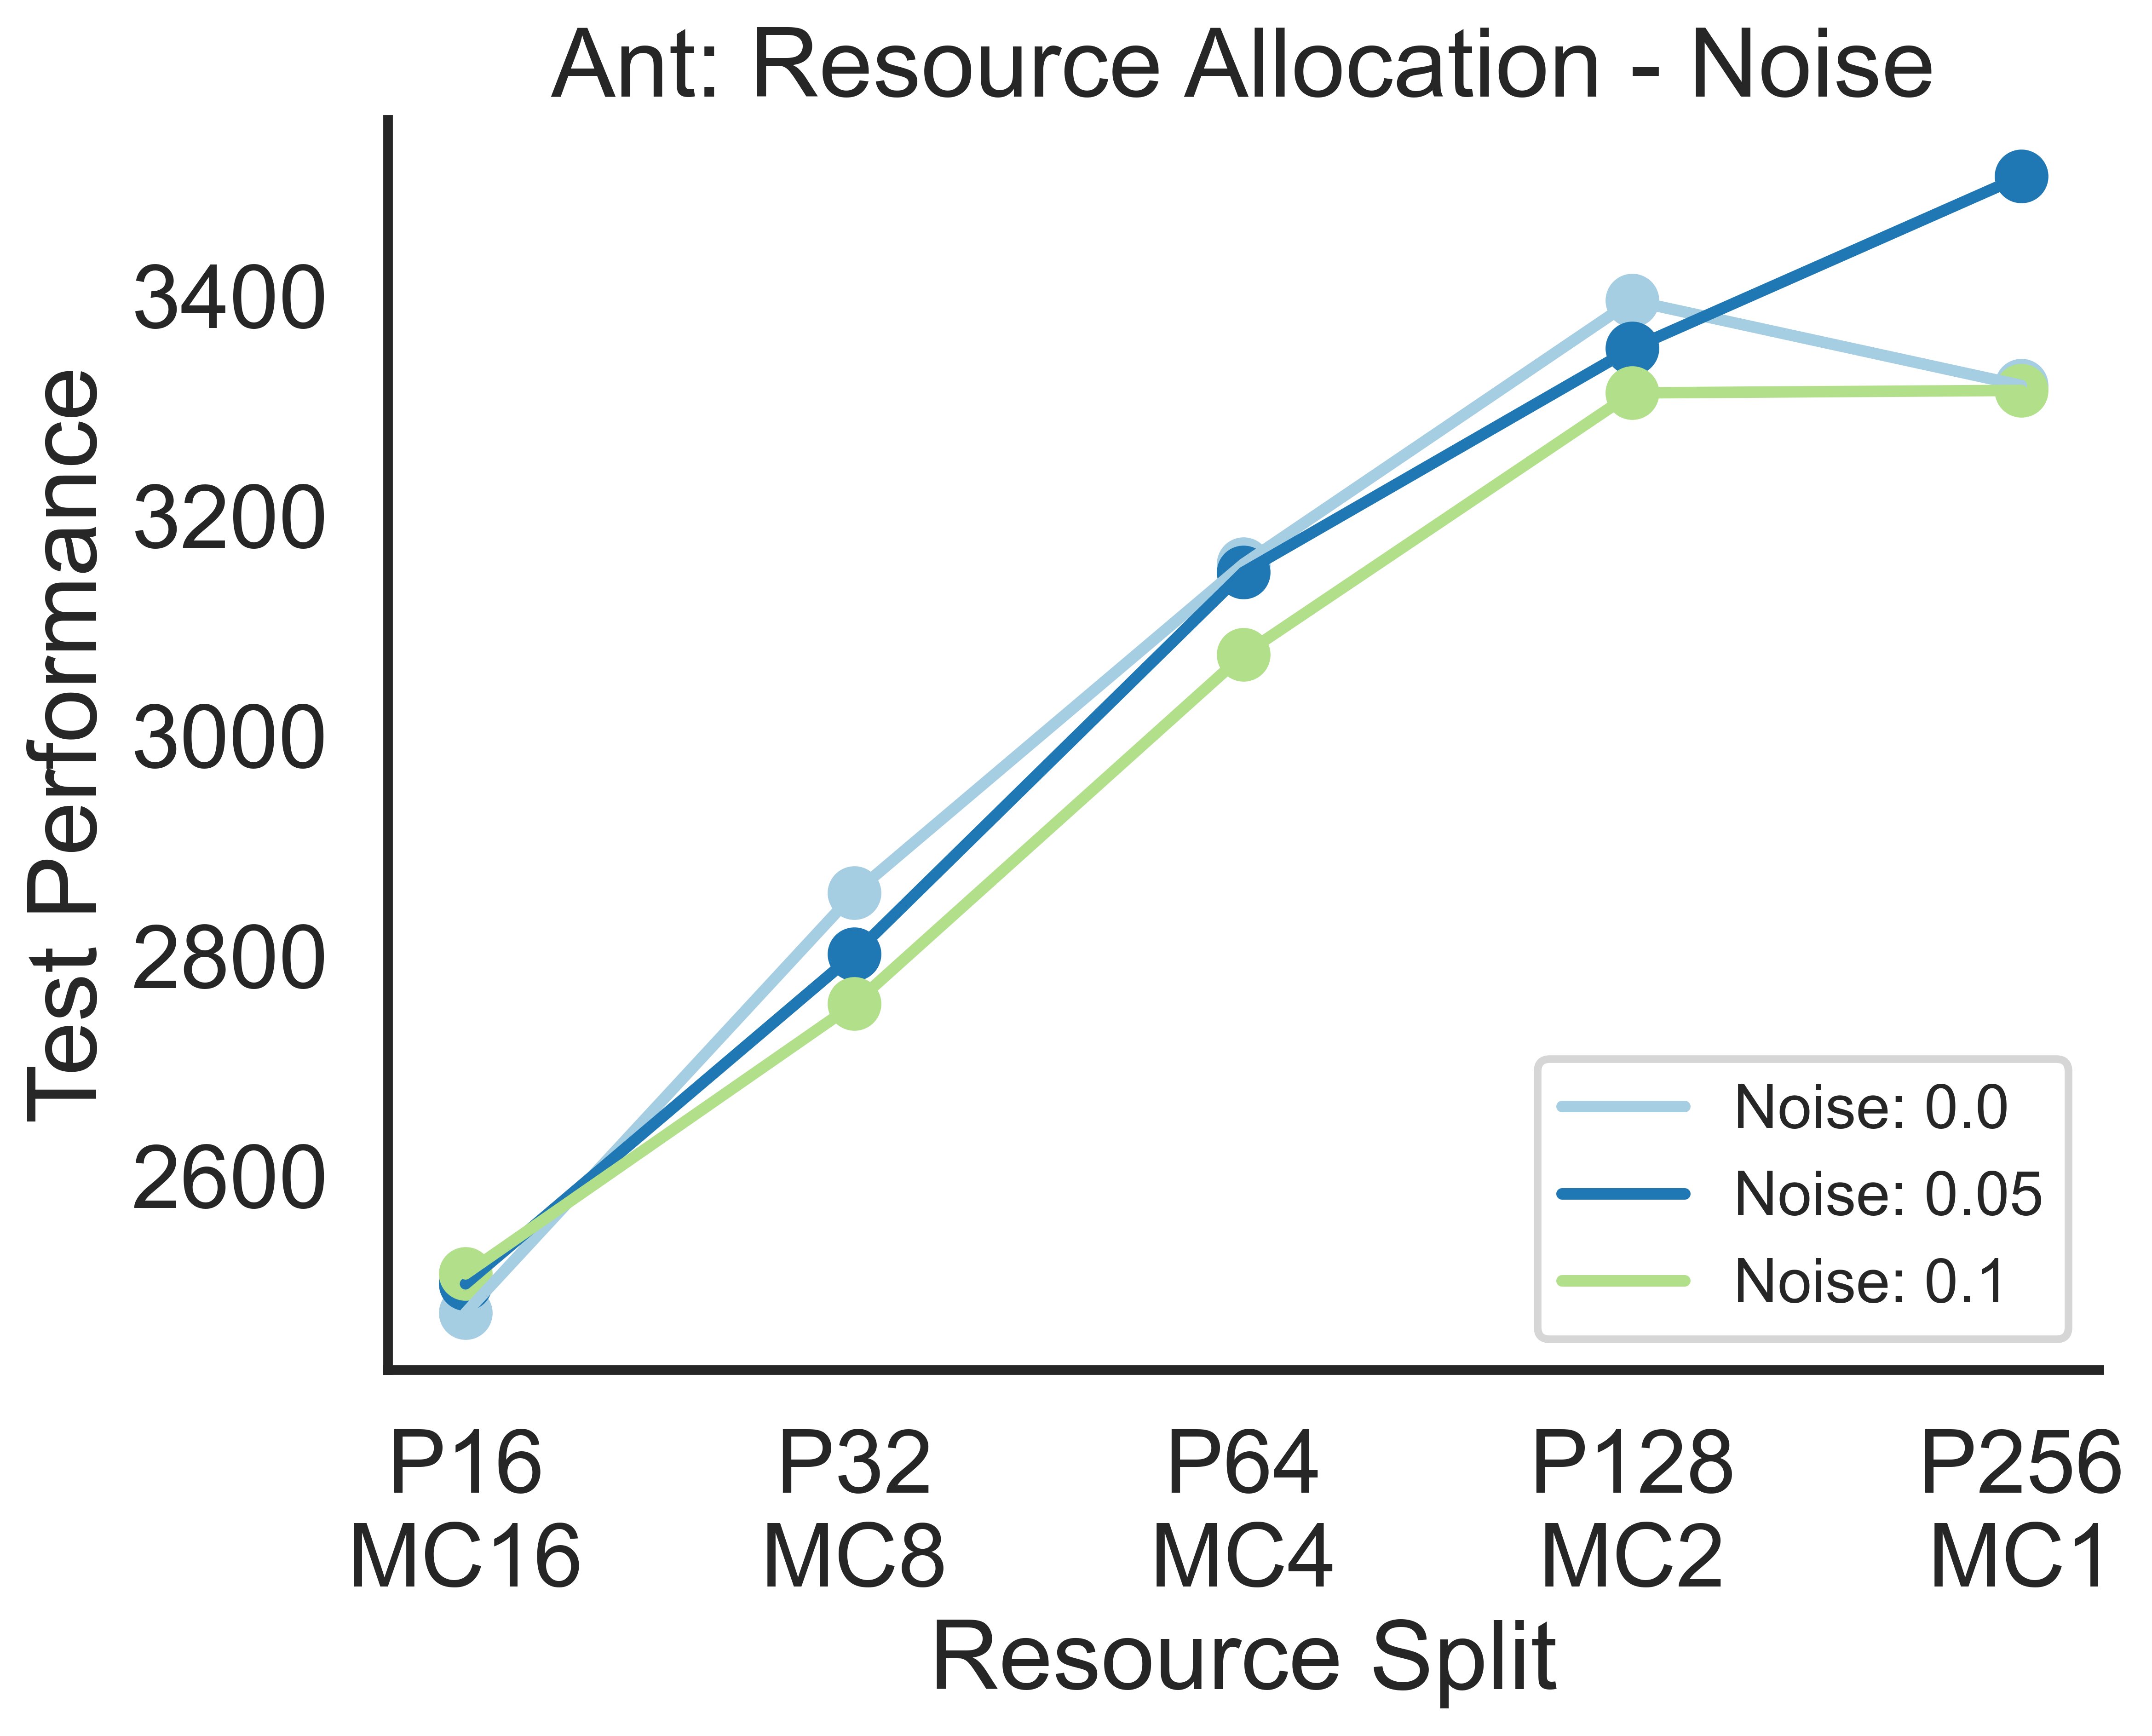

In [11]:
fig, axs = plt.subplots(figsize = (8, 6))

labels = [r"P16" "\n" r"MC16",
          r"P32" "\n" r"MC8",
          r"P64" "\n" r"MC4",
          r"P128" "\n" r"MC2",
          r"P256" "\n" r"MC1"]

for k in results.keys():
    axs.plot(results[k], label=f"Noise: {k}")
    axs.scatter(np.arange(5), results[k])
axs.set_xticks(range(len(results[k])))
axs.set_xticklabels(labels)
axs.set_xlabel("Resource Split")
axs.set_ylabel("Test Performance")
axs.set_title("Ant: Resource Allocation - Noise")
axs.legend(fontsize=16, loc=4)

# Large Grid Search

In [14]:
meta_log, hyper_log = load_result_logs(f"../experiments/ant/grid_noise_large")
hyper_log

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


   env_name  popsize strategy_name  task_config/noise_level  task_config/num_evals_per_member  time_elapsed       run_id  test_eval_perf                                          log_paths                                experiment_dir                                       config_fname                                     seeds model_type                                          log_fname
0       ant       32        OpenES                      0.0                                 2  38362.429626   b_1_eval_0     2468.894482  [experiments/ant/grid_noise_large/b_1_eval_0/l...   experiments/ant/grid_noise_large/b_1_eval_0  experiments/ant/grid_noise_large/b_1_eval_0/b_...  [176588, 363028, 381632, 562958, 924197]        jax  experiments/ant/grid_noise_large/b_1_eval_0/lo...
1       ant       32        OpenES                      0.0                                 4  38362.429626   b_1_eval_1     2536.052588  [experiments/ant/grid_noise_large/b_1_eval_1/l...   experiments/ant/grid_noise_large

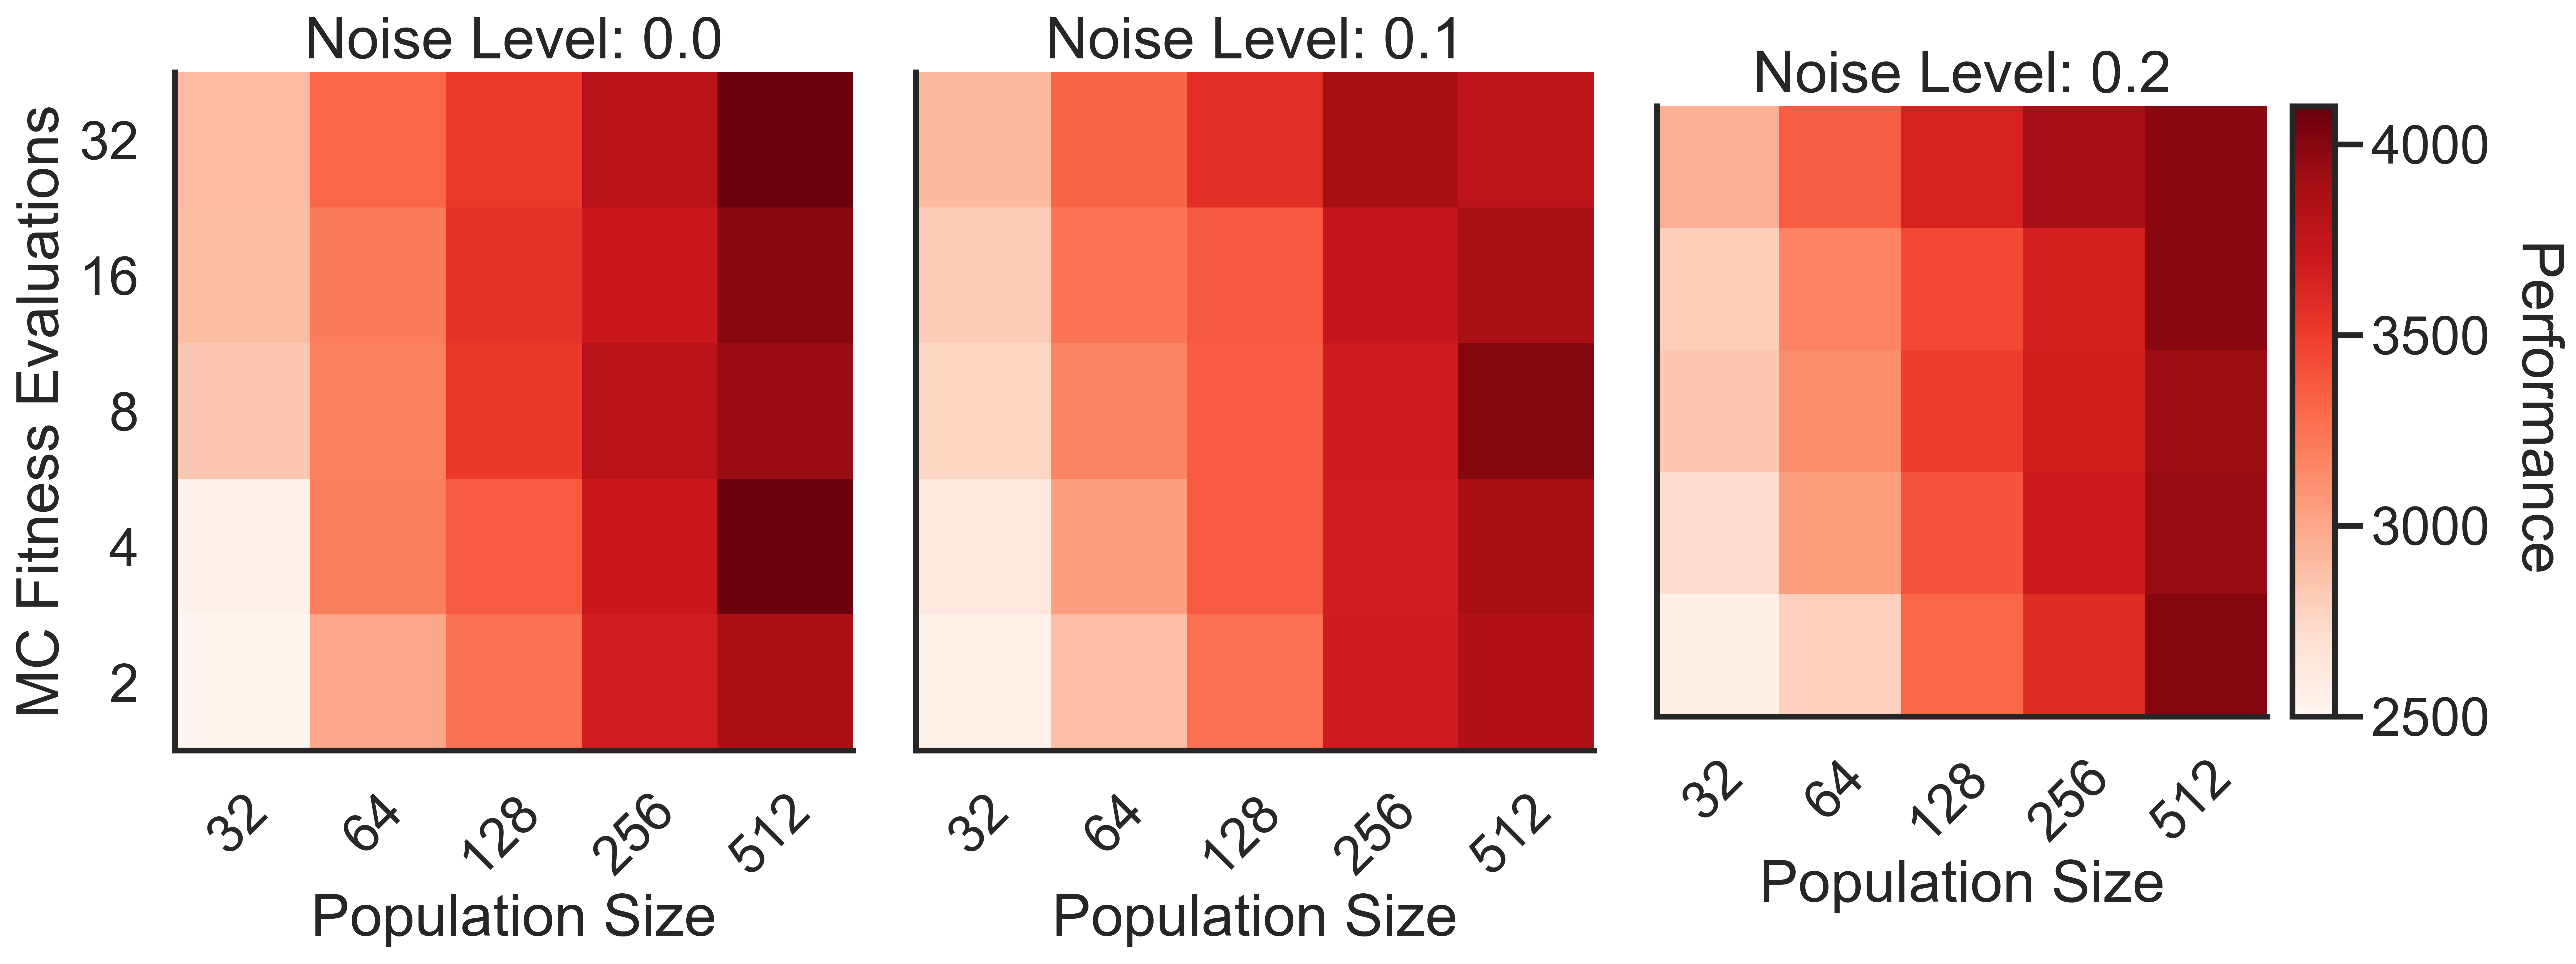

In [16]:
params_to_plot = ["popsize", "task_config/num_evals_per_member"]
target_to_plot = "test_eval_perf"
min_heat = 2500
max_heat = 4100
xylabels = ['Population Size', 'MC Fitness Evaluations']

fig, axs = plt.subplots(1, 3, figsize=(16, 10))
fixed_params = {"task_config/noise_level": 0.0}
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Noise Level: 0.0',
                  xy_labels=xylabels,
                  variable_name='Performance',
                  every_nth_tick=1, round_ticks=0,
                  text_in_cell=False, min_heat=min_heat, max_heat=max_heat,
                  cmap="Reds", fig=fig, ax=axs.flatten()[0],
                  plot_xlabel=True, plot_ylabel=True, plot_colorbar=False)

fixed_params = {"task_config/noise_level": 0.1}
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Noise Level: 0.1',
                  xy_labels=xylabels,
                  variable_name='Performance',
                  every_nth_tick=1, round_ticks=0,
                  text_in_cell=False, min_heat=min_heat, max_heat=max_heat,
                  cmap="Reds", fig=fig, ax=axs.flatten()[1],
                  plot_xlabel=True, plot_ylabel=False, plot_colorbar=False)

fixed_params = {"task_config/noise_level": 0.2}
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Noise Level: 0.2',
                  xy_labels=xylabels,
                  variable_name='Performance',
                  every_nth_tick=1, round_ticks=0,
                  text_in_cell=False, min_heat=min_heat, max_heat=max_heat,
                  cmap="Reds", fig=fig, ax=axs.flatten()[2],
                  plot_xlabel=True, plot_ylabel=False, plot_colorbar=True)
fig.tight_layout()